# MULTICLASS CLASSIFICATION 



In [128]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [129]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [130]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [131]:
#print the unique values in Y_train

print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


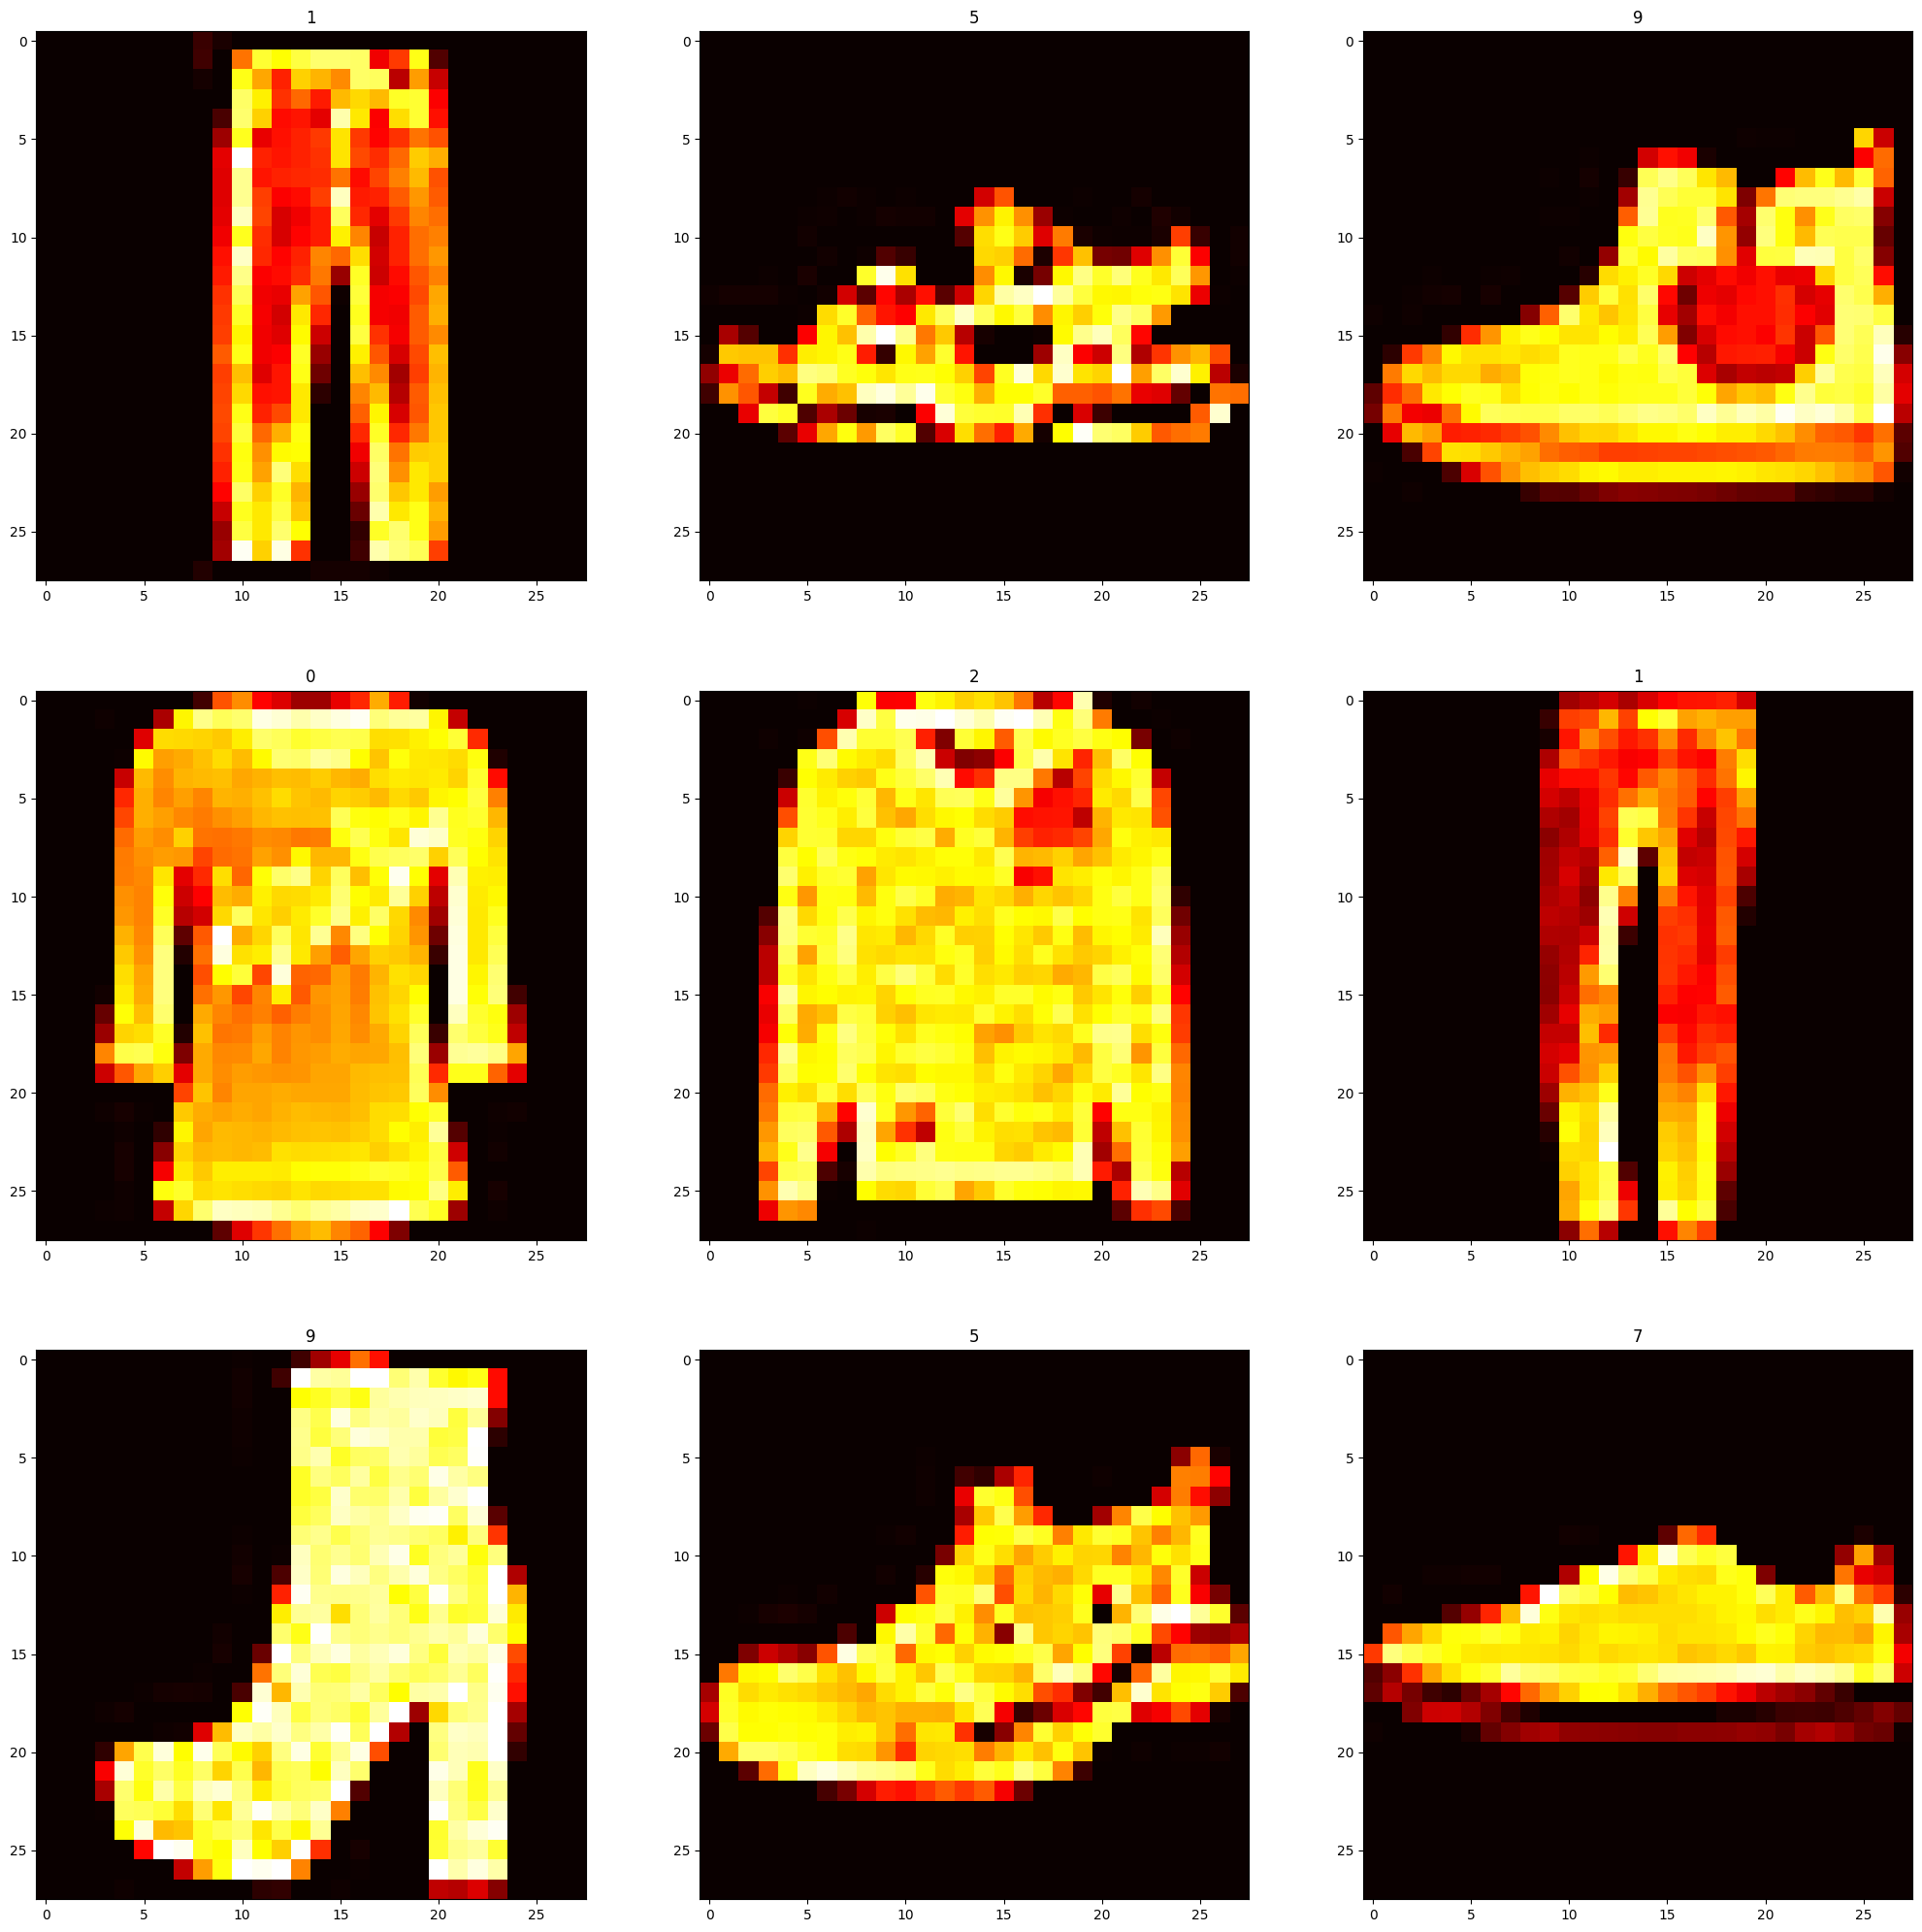

In [132]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  imgplot = plt.imshow(X_train[index], cmap='hot')
  #edit2__add_label_here_
  plt.title(Y_train[index])
  


###These number denotes the respective object
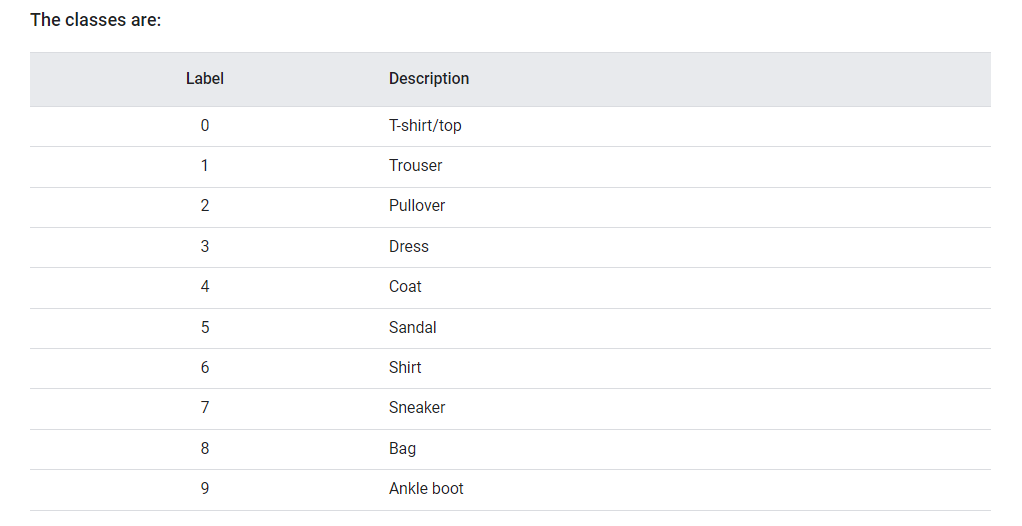

In [133]:
# Find the count of each type of class
unique, counts = np.unique(Y_train, return_counts = True)
for i in range(10):
  print(unique[i], " - ", counts[i])

0  -  814
1  -  793
2  -  811
3  -  781
4  -  788
5  -  811
6  -  809
7  -  806
8  -  799
9  -  788


In [134]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation = 'relu'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [135]:
# Compiling the model
## model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 ),
                  loss = 'sparse_categorical_crossentropy' # __add_loss_function__
                  , metrics=['accuracy'])

In [136]:
#Lets analyse the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [137]:
""" 
[objective] Write the answer here:  871
"""

' \n[objective] Write the answer here:  871\n'

In [138]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, epochs = 15, validation_split=0.2)

Epoch 1/15
200/200 [==============================] - 1s 4ms/step - loss: 15.3472 - accuracy: 0.4675 - val_loss: 1.4663 - val_accuracy: 0.5088
Epoch 2/15
200/200 [==============================] - 1s 3ms/step - loss: 1.2779 - accuracy: 0.5652 - val_loss: 1.1594 - val_accuracy: 0.5788
Epoch 3/15
200/200 [==============================] - 1s 3ms/step - loss: 1.0200 - accuracy: 0.6241 - val_loss: 1.1432 - val_accuracy: 0.6519
Epoch 4/15
200/200 [==============================] - 1s 3ms/step - loss: 0.9297 - accuracy: 0.6508 - val_loss: 1.0863 - val_accuracy: 0.6550
Epoch 5/15
200/200 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.6812 - val_loss: 1.0237 - val_accuracy: 0.6469
Epoch 6/15
200/200 [==============================] - 1s 3ms/step - loss: 0.8202 - accuracy: 0.6859 - val_loss: 1.0065 - val_accuracy: 0.6694
Epoch 7/15
200/200 [==============================] - 1s 3ms/step - loss: 0.7932 - accuracy: 0.6944 - val_loss: 0.9674 - val_accuracy: 0.6425
Epoch

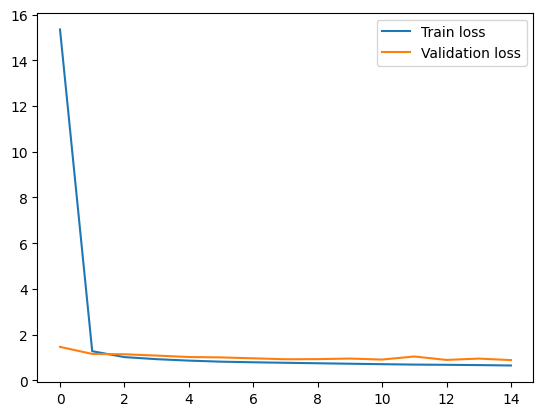

In [139]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [140]:
"""
[Under 100 words] Write your answer here:
 
This means that the initial loss after the first batch was very high. Then after the first batch the model updated its weights and the loss decreased by a significant amount and came close to zero. The validation loss is calculated after each epoch thus, the validation loss is always close to zero. This also suggests that the model has prodcued a good fit as both the validation loss and train loss are close to zero.

"""


'\n[Under 100 words] Write your answer here:\n \nThis means that the initial loss after the first batch was very high. Then after the first batch the model updated its weights and the loss decreased by a significant amount and came close to zero. The validation loss is calculated after each epoch thus, the validation loss is always close to zero. This also suggests that the model has prodcued a good fit as both the validation loss and train loss are close to zero.\n\n'

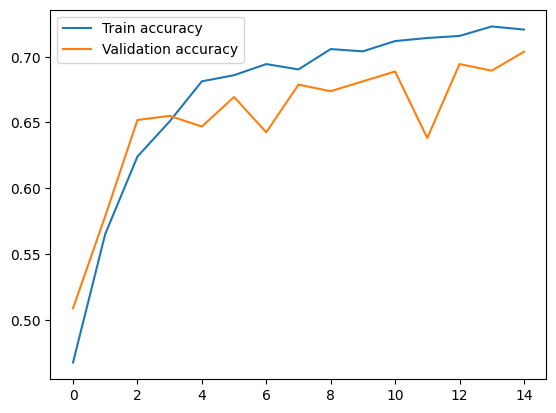

In [141]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [142]:
"""
[Under 100 words] Write your answer here:

This depicts the accuracy of the model. Train accuracy and validation accuracy are close to each other. This means that the model is quite accurate

"""

'\n[Under 100 words] Write your answer here:\n\nThis depicts the accuracy of the model. Train accuracy and validation accuracy are close to each other. This means that the model is quite accurate\n\n'

In [143]:
#Checking the prediction

Y_predicted = model.predict(X_test)
print(Y_predicted)
print(Y_predicted.shape)


63/63 [==============================] - 0s 2ms/step
[[2.8388327e-12 1.5814962e-11 4.1419702e-07 ... 3.9210964e-02
  1.7891092e-07 9.6025282e-01]
 [1.1047874e-34 9.9999994e-01 1.7359896e-24 ... 1.3346272e-27
  1.5175545e-35 5.5563464e-34]
 [6.8639670e-19 9.9999899e-01 4.9641583e-16 ... 1.6432338e-09
  8.3956029e-21 1.8727222e-18]
 ...
 [9.6576321e-01 2.6917649e-08 1.6568094e-07 ... 1.9307817e-13
  4.0542946e-13 1.7099274e-18]
 [6.0846987e-03 1.3971882e-03 3.7488228e-01 ... 8.9572467e-08
  2.4226895e-03 5.0472236e-06]
 [2.3716144e-02 8.9612389e-03 3.3231154e-01 ... 1.7909806e-05
  1.2785794e-02 2.3852939e-04]]
(2000, 10)


In [144]:
# Calculate the R2score for the test data

corr_matrix = np.corrcoef(Y_test, np.argmax(Y_predicted, axis = 1))
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.7088948128534587


In [145]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [146]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)

(128, 64)
(64, 10)


In [147]:
# Does that satisfied the matrix multiplication math discussed earlier 
## I was unable to attend the class therefore I won't be able to answer this question
